# 3a EDA and exploratory Linear Regression

In [111]:
import pandas as pd
import numpy as np
import re
import math
import seaborn as sns
from matplotlib import pyplot as plt
from collections import defaultdict
#from IPython.core.display import display, HTML
import pickle
import copy
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#display(HTML(my_html))     # make sure Jupyter knows to display it as HTML

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#director = 'godard'
director = 'hitchcock'
#director = 'bergman'
#director = 'fassbinder'
#director = 'herzog'
#director = 'scorsese'
#director='godard'

In [112]:

dir_str = director + '/'

films_filename = 'films_to_analyze_' + director +'.pickle'
with open(dir_str + films_filename, 'rb') as read_file:
    films_to_analyze = pickle.load(read_file)

In [113]:
films_to_analyze.head()

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Radha Mitchell,Michael J. Farina,Jonny Lee Miller,Chloë Sevigny,Matt Servitto,Arija Bareikis,Brooke Smith,Zak Orth,Will Ferrell,Akiko Wakabayashi
0,Rifkin's Festival,2020.0,2 October 2020 (Spain),92.0,92.0,NaN,1301430.0,512116.0,1301430.0,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A Rainy Day in New York,2019.0,10 November 2020 (USA),92.0,92.0,NaN,18182784.0,22002504.0,18182784.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wonder Wheel,2017.0,15 December 2017 (USA),101.0,101.0,25000000.0,13736872.0,15889124.0,13736872.0,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Café Society,2016.0,5 August 2016 (USA),96.0,96.0,30000000.0,43763247.0,43763247.0,NaN,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Irrational Man,2015.0,7 August 2015 (USA),95.0,95.0,11000000.0,29083597.0,27391084.0,29083597.0,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
prevalent_actors_filename  = 'prevalent_actors_' + director +'.pickle'
with open(dir_str + prevalent_actors_filename, 'rb') as read_file:
    prevalent_actor_columns = pickle.load(read_file)

In [115]:
prevalent_actor_columns

Index(['Woody Allen', 'Mia Farrow', 'Diane Keaton', 'Maurice Sonnenberg',
       'Wallace Shawn', 'Stephanie Roth Haberle', 'Dan Frazer', 'Julie Kavner',
       'John Doumanian', 'Tony Roberts', 'Alan Alda', 'Paul Herman',
       'Ira Wheeler', 'Dianne Wiest', 'Louise Lasser', 'Douglas McGrath',
       'Scarlett Johansson', 'Sam Waterston'],
      dtype='object')

In [116]:
pickled_dict_of_actors_filename = 'dict_of_actors_' + director +'.pickle'
with open(dir_str + pickled_dict_of_actors_filename, 'rb') as read_file:
    dict_of_all_actors  = pickle.load(read_file) 

In [117]:
analysis_columns = ['title', 'year', 'duration', 'cinematographer', 'documentary', 'tv_series','rating', 'rating_count', *prevalent_actor_columns]

In [118]:
analysis_columns

['title',
 'year',
 'duration',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating',
 'rating_count',
 'Woody Allen',
 'Mia Farrow',
 'Diane Keaton',
 'Maurice Sonnenberg',
 'Wallace Shawn',
 'Stephanie Roth Haberle',
 'Dan Frazer',
 'Julie Kavner',
 'John Doumanian',
 'Tony Roberts',
 'Alan Alda',
 'Paul Herman',
 'Ira Wheeler',
 'Dianne Wiest',
 'Louise Lasser',
 'Douglas McGrath',
 'Scarlett Johansson',
 'Sam Waterston']

## Dataset partitioned for analysis
except one-hot-encoding `cinematographer`

In [119]:
films_to_analyze.head()

,title,year,release_date,duration,runtime,budget,worldwide_gross,worldwide_gross_imdb,worldwide_gross_bo,rating,...,Radha Mitchell,Michael J. Farina,Jonny Lee Miller,Chloë Sevigny,Matt Servitto,Arija Bareikis,Brooke Smith,Zak Orth,Will Ferrell,Akiko Wakabayashi
0,Rifkin's Festival,2020.0,2 October 2020 (Spain),92.0,92.0,NaN,1301430.0,512116.0,1301430.0,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A Rainy Day in New York,2019.0,10 November 2020 (USA),92.0,92.0,NaN,18182784.0,22002504.0,18182784.0,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wonder Wheel,2017.0,15 December 2017 (USA),101.0,101.0,25000000.0,13736872.0,15889124.0,13736872.0,6.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Café Society,2016.0,5 August 2016 (USA),96.0,96.0,30000000.0,43763247.0,43763247.0,NaN,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Irrational Man,2015.0,7 August 2015 (USA),95.0,95.0,11000000.0,29083597.0,27391084.0,29083597.0,6.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
films_and_features_to_analyze_df = films_to_analyze[analysis_columns]

In [121]:
films_and_features_to_analyze_df.head() 

,title,year,duration,cinematographer,documentary,tv_series,rating,rating_count,Woody Allen,Mia Farrow,...,John Doumanian,Tony Roberts,Alan Alda,Paul Herman,Ira Wheeler,Dianne Wiest,Louise Lasser,Douglas McGrath,Scarlett Johansson,Sam Waterston
0,Rifkin's Festival,2020.0,92.0,Vittorio Storaro,0.0,0.0,6.2,723.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,A Rainy Day in New York,2019.0,92.0,Vittorio Storaro,0.0,0.0,6.5,30151.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wonder Wheel,2017.0,101.0,Vittorio Storaro,0.0,0.0,6.2,25209.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Café Society,2016.0,96.0,Vittorio Storaro,0.0,0.0,6.6,71114.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Irrational Man,2015.0,95.0,Darius Khondji,0.0,0.0,6.6,58704.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
x_label = 'year'
y_label = 'rating'
x_ = films_and_features_to_analyze_df[x_label]
y_ = films_and_features_to_analyze_df[y_label]

In [123]:
films_and_features_to_analyze_df.columns

Index(['title', 'year', 'duration', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'rating_count', 'Woody Allen', 'Mia Farrow',
       'Diane Keaton', 'Maurice Sonnenberg', 'Wallace Shawn',
       'Stephanie Roth Haberle', 'Dan Frazer', 'Julie Kavner',
       'John Doumanian', 'Tony Roberts', 'Alan Alda', 'Paul Herman',
       'Ira Wheeler', 'Dianne Wiest', 'Louise Lasser', 'Douglas McGrath',
       'Scarlett Johansson', 'Sam Waterston'],
      dtype='object')

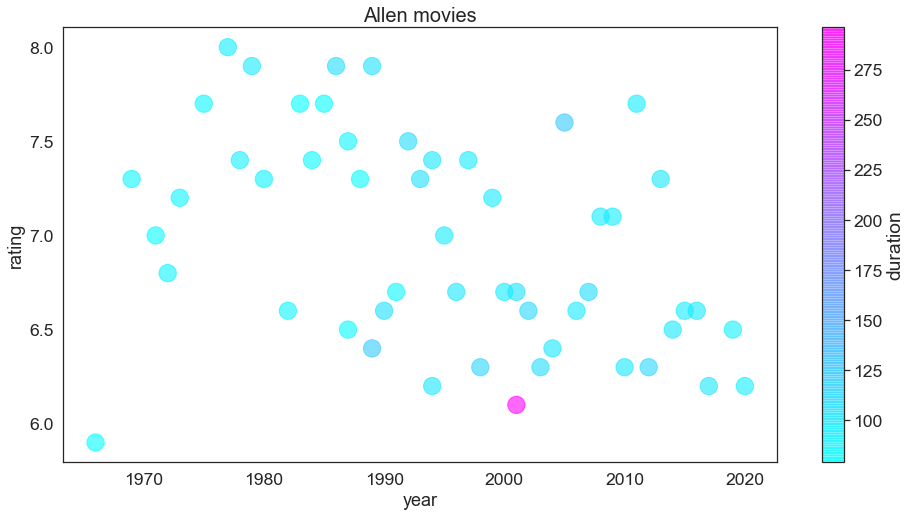

In [124]:
plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
cmap=plt.get_cmap("cool")
color_dimension = 'duration'
cm=films_and_features_to_analyze_df[color_dimension].tolist()

category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension)

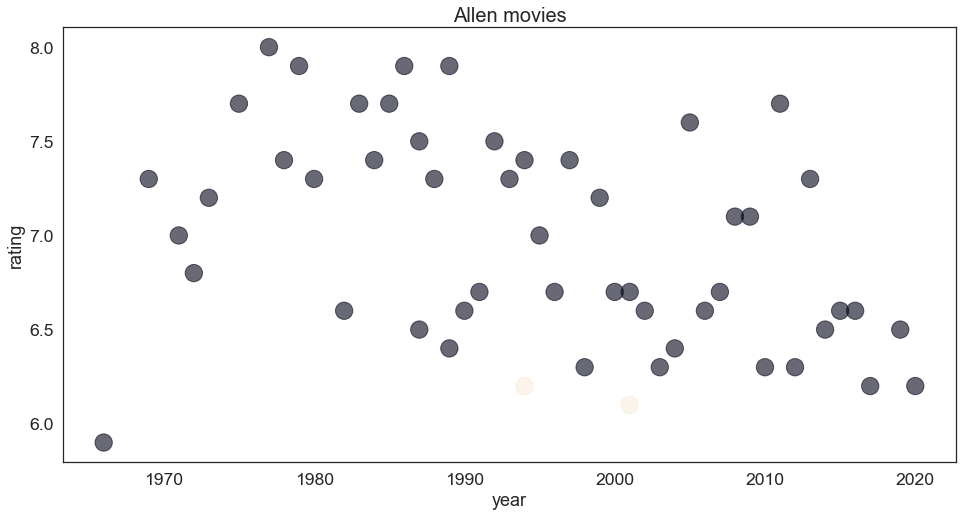

In [125]:
plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')

category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c = films_and_features_to_analyze_df[category], s=(size_,))

In [126]:
x_label = 'year'
y_label = 'duration'
x_ = films_and_features_to_analyze_df[x_label]
y_ = films_and_features_to_analyze_df[y_label]

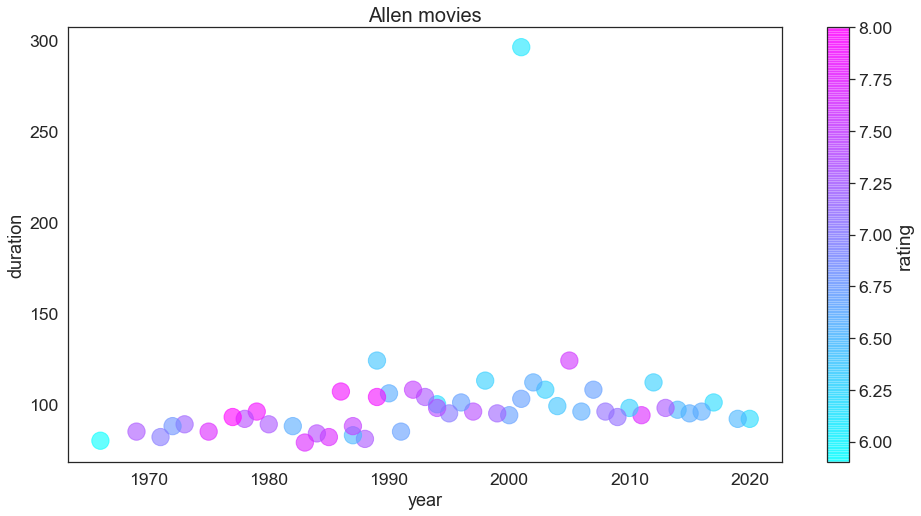

In [127]:
plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
cmap=plt.get_cmap("cool")
color_dimension = 'rating'
cm=films_and_features_to_analyze_df[color_dimension ].tolist()
category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension )

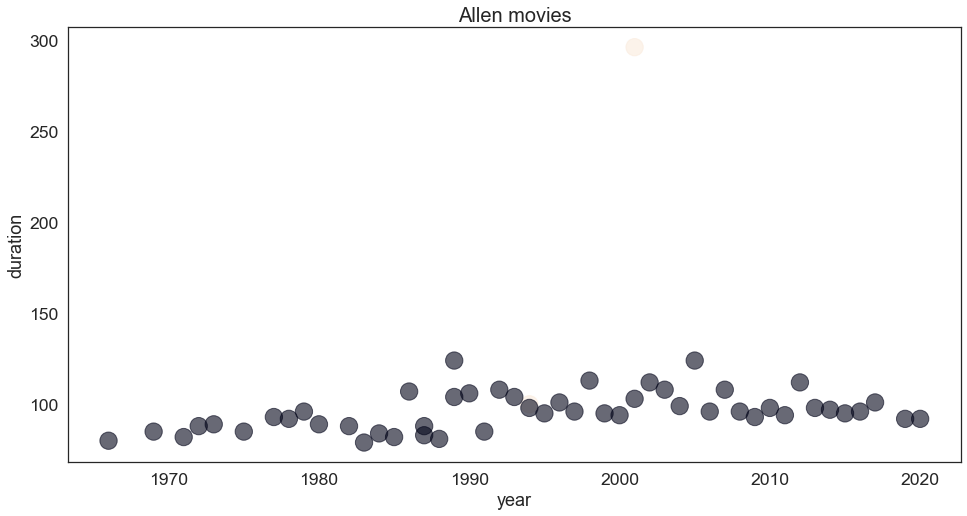

In [128]:
plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c = films_and_features_to_analyze_df[category], s=(size_,))


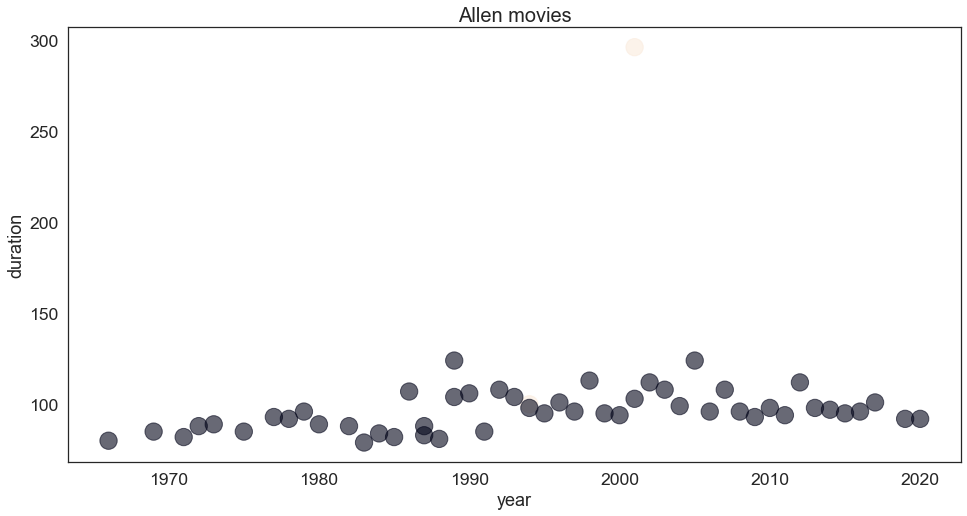

In [129]:
plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c = films_and_features_to_analyze_df[category], s=(size_,))


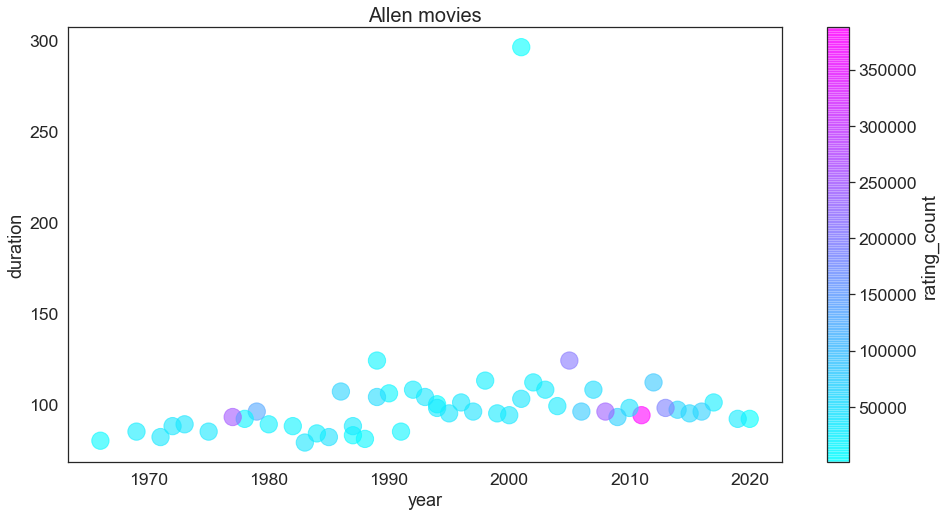

In [130]:
plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
cmap=plt.get_cmap("cool")
color_dimension = 'rating_count'
cmap=plt.get_cmap("cool")
cm=films_and_features_to_analyze_df[color_dimension ].tolist()
category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension )
#plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c = films_and_features_to_analyze_df[category], s=(size_,))

In [131]:
x_label = 'year'
y_label = 'rating_count'
x_ = films_and_features_to_analyze_df[x_label]
y_ = films_and_features_to_analyze_df[y_label]

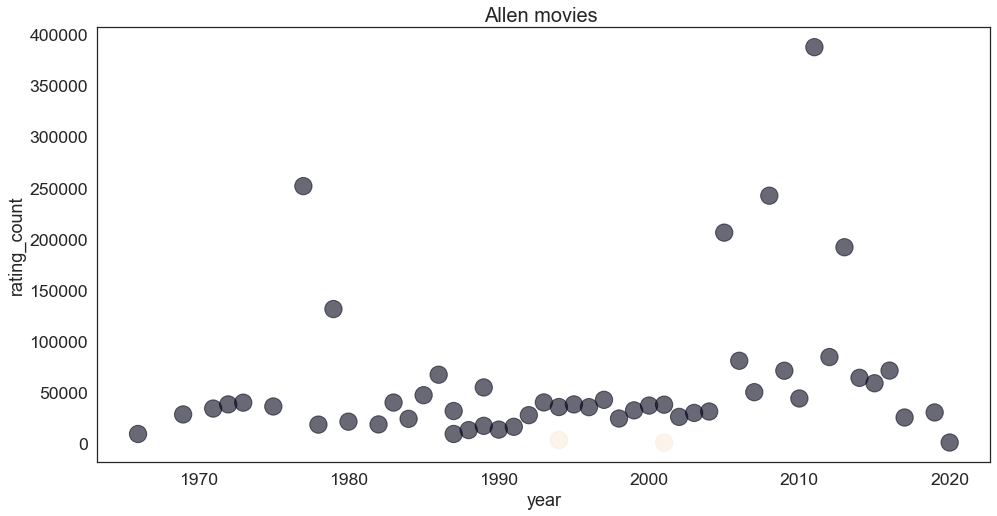

In [132]:
plt.figure(figsize=(16,8))
size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies ', fontsize='20')
category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c = films_and_features_to_analyze_df[category], s=(size_,))


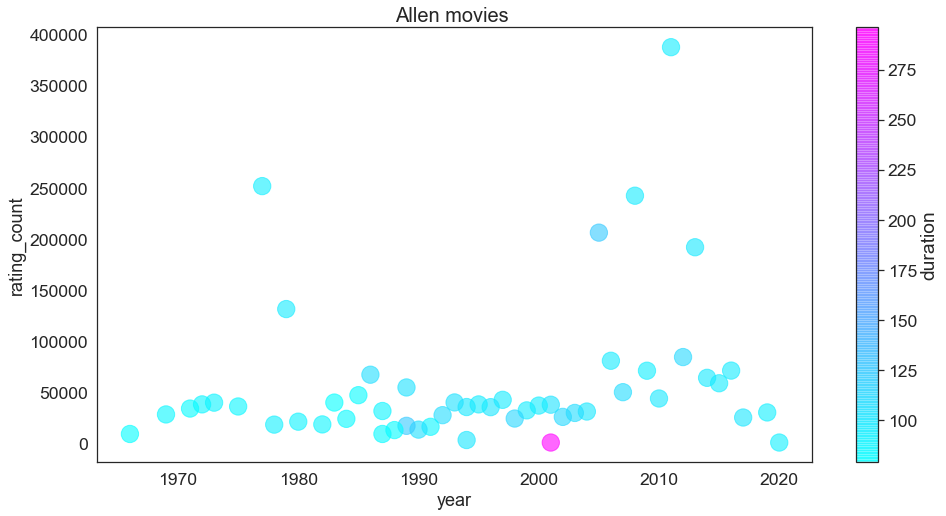

In [133]:
plt.figure(figsize=(16,8))
size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies ', fontsize='20')
color_dimension = 'duration'

cm=films_and_features_to_analyze_df[color_dimension ].tolist()
cmap=plt.get_cmap("cool")
category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension )

In [134]:
#films_and_features_to_analyze_df[films_and_features_to_analyze_df['tv_series']!=1]

In [135]:
x_label = 'year'
y_label = 'rating_count'
x_ = films_and_features_to_analyze_df[films_and_features_to_analyze_df['tv_series']!=1][x_label]
y_ = films_and_features_to_analyze_df[films_and_features_to_analyze_df['tv_series']!=1][y_label]

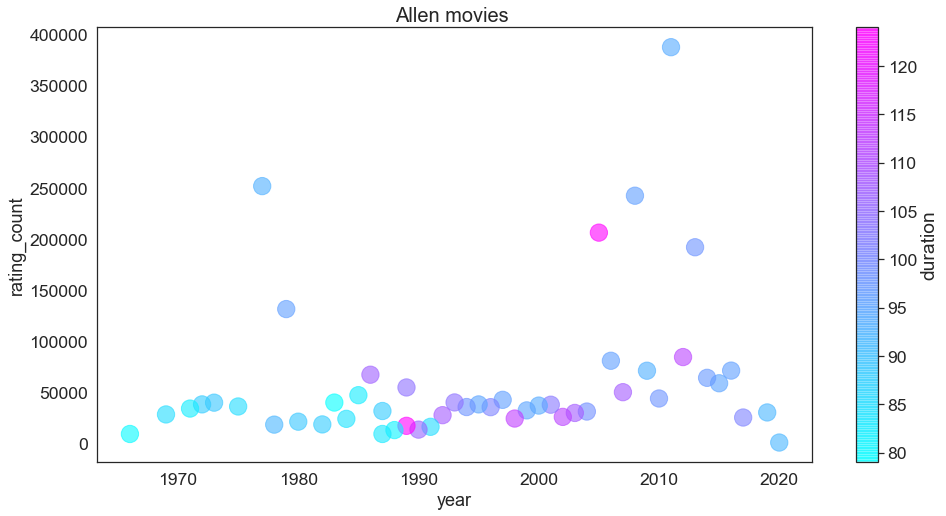

In [136]:
plt.figure(figsize=(16,8))
size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies ', fontsize='20')
color_dimension = 'duration'

cm=films_and_features_to_analyze_df[films_and_features_to_analyze_df['tv_series']!=1][color_dimension ].tolist()
cmap=plt.get_cmap("cool")
#category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension )

In [137]:
print( min(x_), max(x_))

1966.0 2020.0


In [138]:
from scipy import signal
signal.unit_impulse(1960) # come back to this to attempt to model "dirac impulse response" 
# for rating count based on year

array([1., 0., 0., ..., 0., 0., 0.])

In [139]:
films_and_features_to_analyze_df[films_and_features_to_analyze_df['duration'] <65]

,title,year,duration,cinematographer,documentary,tv_series,rating,rating_count,Woody Allen,Mia Farrow,...,John Doumanian,Tony Roberts,Alan Alda,Paul Herman,Ira Wheeler,Dianne Wiest,Louise Lasser,Douglas McGrath,Scarlett Johansson,Sam Waterston


#### Breakdown by **cinematographers**, 
(for instance Jack E. Cox, Robert Burks, and Bernard Knowles in Hitchcock dataset)

In [140]:
cinematographer = 'Jack E. Cox'

In [141]:
ctgrphr_flix = films_and_features_to_analyze_df[films_and_features_to_analyze_df['cinematographer']==cinematographer]
other_flix = films_and_features_to_analyze_df[films_and_features_to_analyze_df['cinematographer']!=cinematographer]


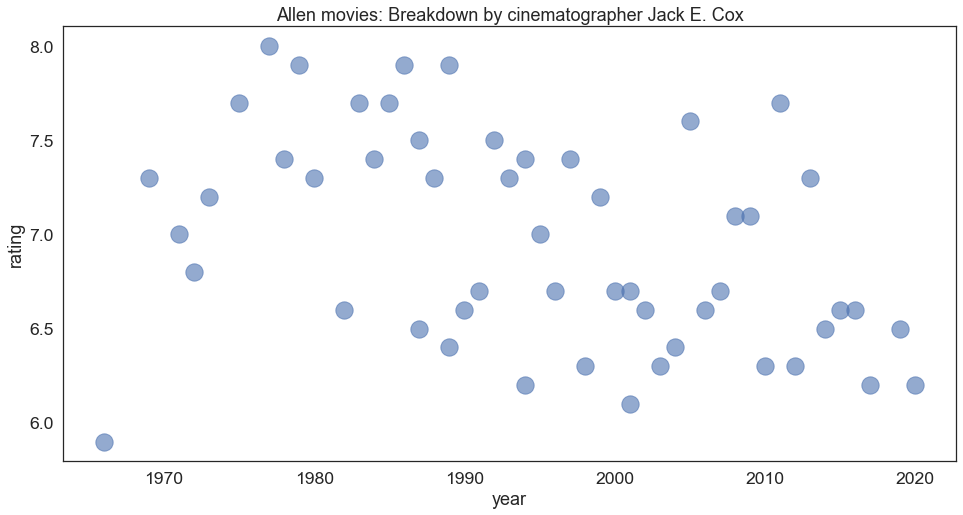

In [142]:
x_label = 'year'
y_label = 'rating'

x_cox = ctgrphr_flix[x_label]
y_cox = ctgrphr_flix[y_label]
x_non_cox = other_flix[x_label]
y_non_cox = other_flix[y_label]

plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies: Breakdown by cinematographer ' + cinematographer, fontsize='18')

category = 'tv_series'
plt.scatter(x=x_cox, y=y_cox, marker='o', alpha=alpha_, c = 'r', s=(size_,))
plt.scatter(x=x_non_cox, y=y_non_cox, marker='o', alpha=alpha_, c = 'b', s=(size_,))

plt.show()

In [143]:
cinematographer = 'Robert Burks'

In [144]:

ctgrphr_flix = films_and_features_to_analyze_df[films_and_features_to_analyze_df['cinematographer']==cinematographer]
other_flix = films_and_features_to_analyze_df[films_and_features_to_analyze_df['cinematographer']!=cinematographer]


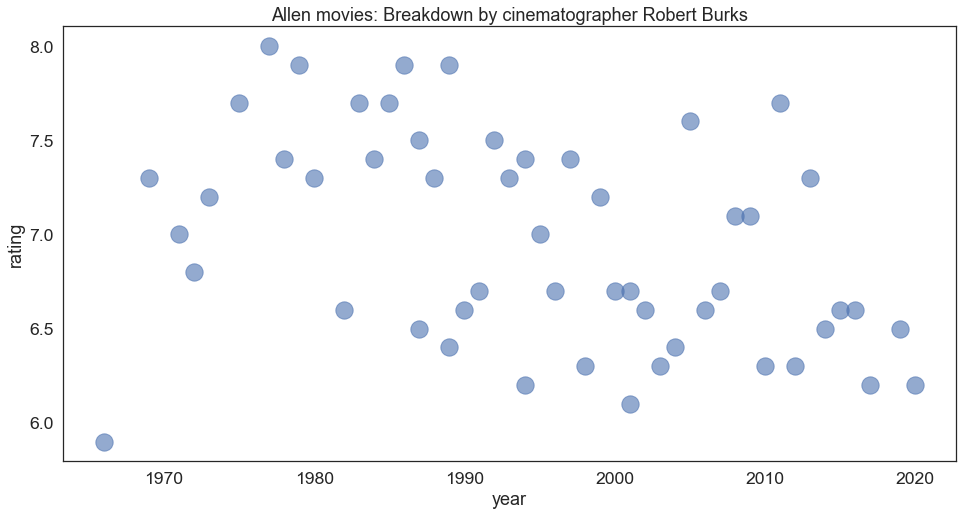

In [145]:
x_label = 'year'
y_label = 'rating'

x_cox = ctgrphr_flix[x_label]
y_cox = ctgrphr_flix[y_label]
x_non_cox = other_flix[x_label]
y_non_cox = other_flix[y_label]

plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies: Breakdown by cinematographer ' + cinematographer, fontsize='18')

category = 'tv_series'
plt.scatter(x=x_cox, y=y_cox, marker='o', alpha=alpha_, c = 'r', s=(size_,))
plt.scatter(x=x_non_cox, y=y_non_cox, marker='o', alpha=alpha_, c = 'b', s=(size_,))

plt.show()

In [146]:
cinematographer = 'Bernard Knowles'

In [147]:

ctgrphr_flix = films_and_features_to_analyze_df[films_and_features_to_analyze_df['cinematographer']==cinematographer]
other_flix = films_and_features_to_analyze_df[films_and_features_to_analyze_df['cinematographer']!=cinematographer]


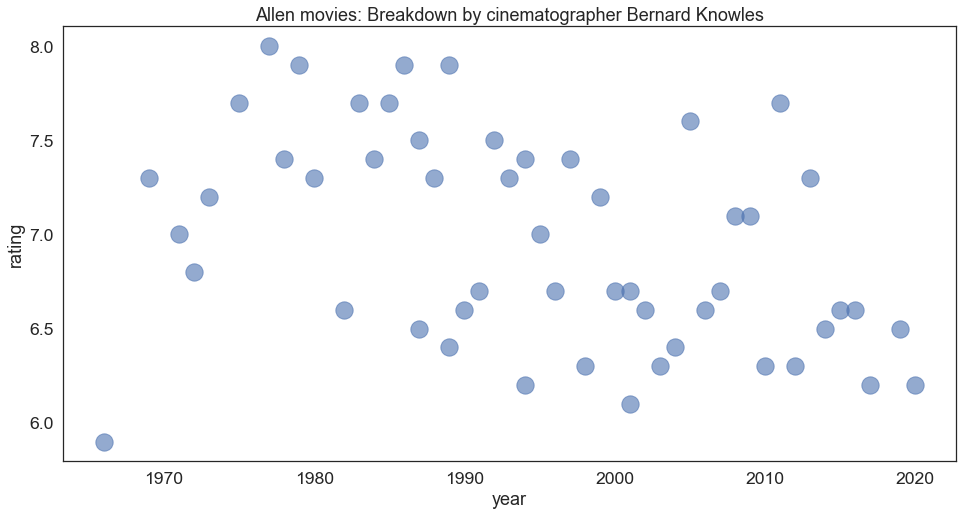

In [148]:
x_label = 'year'
y_label = 'rating'

x_cox = ctgrphr_flix[x_label]
y_cox = ctgrphr_flix[y_label]
x_non_cox = other_flix[x_label]
y_non_cox = other_flix[y_label]

plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies: ' + 'Breakdown by cinematographer ' + cinematographer, fontsize='18')

category = 'tv_series'
plt.scatter(x=x_cox, y=y_cox, marker='o', alpha=alpha_, c = 'r', s=(size_,))
plt.scatter(x=x_non_cox, y=y_non_cox, marker='o', alpha=alpha_, c = 'b', s=(size_,))

plt.show()

#### Recode misc. cinematographers to `OTHER` to ameliorate issue of not dropping a column and also to increase the chance it will occur in the test set as well

In [149]:
cinematographer_include_threshold = films_and_features_to_analyze_df['cinematographer'].value_counts().min()
cinematographer_include_threshold

1

In [150]:
value_counts = films_and_features_to_analyze_df['cinematographer'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= cinematographer_include_threshold].index
films_and_features_to_analyze_df['cinematographer'].replace(to_remove, 'OTHER', inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Regression analysis on `rating`,  `duration`, and `year` etc

#### `rating` as target

### Train Test Split

In [151]:
films_and_features_to_analyze_df.columns # review columns we start with

Index(['title', 'year', 'duration', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'rating_count', 'Woody Allen', 'Mia Farrow',
       'Diane Keaton', 'Maurice Sonnenberg', 'Wallace Shawn',
       'Stephanie Roth Haberle', 'Dan Frazer', 'Julie Kavner',
       'John Doumanian', 'Tony Roberts', 'Alan Alda', 'Paul Herman',
       'Ira Wheeler', 'Dianne Wiest', 'Louise Lasser', 'Douglas McGrath',
       'Scarlett Johansson', 'Sam Waterston'],
      dtype='object')

In [152]:
selected_cols = [*films_and_features_to_analyze_df.columns[1:6], *films_and_features_to_analyze_df.columns[7:]]

In [153]:
X= films_and_features_to_analyze_df[selected_cols]
y= films_and_features_to_analyze_df['rating']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Preprocessing

#### Categorical Variable Preprocessing

In [155]:
cat_ohe_vars = ['cinematographer']
X_train_cat_ohe = X_train[cat_ohe_vars]
#X_train_cat_ohe 

#### OneHotEncoding

In [156]:
#ohe = OneHotEncoder(sparse=False, drop='first')
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore')
ohe.fit(X_train_cat_ohe)
cats_ohe = ohe.transform(X_train_cat_ohe)


In [157]:
columns=ohe.get_feature_names(cat_ohe_vars)

columns

array(['cinematographer_Carlo Di Palma', 'cinematographer_Darius Khondji',
       'cinematographer_David M. Walsh', 'cinematographer_Fei Zhao',
       'cinematographer_Gordon Willis',
       'cinematographer_Javier Aguirresarobe', 'cinematographer_OTHER',
       'cinematographer_Remi Adefarasin', 'cinematographer_Sven Nykvist',
       'cinematographer_Vilmos Zsigmond',
       'cinematographer_Vittorio Storaro'], dtype=object)

In [158]:
X_train_cat_ohe_df = pd.DataFrame(cats_ohe, columns=columns, index=X_train_cat_ohe.index)
X_train_cat_ohe_df.head()

,cinematographer_Carlo Di Palma,cinematographer_Darius Khondji,cinematographer_David M. Walsh,cinematographer_Fei Zhao,cinematographer_Gordon Willis,cinematographer_Javier Aguirresarobe,cinematographer_OTHER,cinematographer_Remi Adefarasin,cinematographer_Sven Nykvist,cinematographer_Vilmos Zsigmond,cinematographer_Vittorio Storaro
25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Repeating transformations on testing set

In [159]:
X_test_cat_ohe = X_test[['cinematographer']]
X_test_cat_ohe
cats_ohe_test = ohe.transform(X_test_cat_ohe)

cat_ohe_columns = ohe.get_feature_names(['cinematographer'])
X_test_cat_ohe_df = pd.DataFrame(cats_ohe_test, columns=cat_ohe_columns)

### Continous Variable Preprocessing

#### Select continuous variables from training set

In [160]:
X_train_cont = X_train[['year', 'duration', 'rating_count']]
X_train_cont.head(70)



,year,duration,rating_count
25,1997.0,96.0,42509.0
4,2016.0,96.0,71114.0
34,1989.0,104.0,54605.0
17,2003.0,108.0,29681.0
32,1991.0,85.0,16118.0
42,1983.0,79.0,39839.0
46,1978.0,92.0,18257.0
9,2011.0,94.0,387522.0
6,2014.0,97.0,64032.0
52,1971.0,82.0,33972.0


####  scale the continuous variables in the train set

In [161]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()


,year,duration,rating_count
25,0.110298,-0.002490,-0.269781
4,1.407618,-0.002490,0.098981
34,-0.435941,0.774260,-0.113845
17,0.519978,1.162634,-0.435153
32,-0.299381,-1.070520,-0.610001


#### select and scale the continuous variables in the test set

In [162]:
X_test_cont = X_test[['year', 'duration', 'rating_count']]
X_test_cont.head()

,year,duration,rating_count
53,1969.0,85.0,28204.0
20,2001.0,296.0,720.0
38,1987.0,88.0,31559.0
22,2000.0,94.0,36889.0
7,2013.0,98.0,191782.0


In [163]:
X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,year,duration,rating_count
53,-1.801541,-1.070520,-0.454194
20,0.383418,19.416243,-0.808504
38,-0.572501,-0.779239,-0.410943
22,0.315138,-0.196677,-0.342231
7,1.202778,0.191698,1.654574


### Combine the continuous, categorical, and ohe cat features for our testing set


In [164]:
cat_columns = ['documentary', 'tv_series', *prevalent_actor_columns]
X_train_cat_df = X_train[cat_columns]


In [165]:
X_train_combined = pd.concat([X_train_scaled_df, X_train_cat_ohe_df, X_train_cat_df, ], axis='columns')

X_train_combined.head(10)

,year,duration,rating_count,cinematographer_Carlo Di Palma,cinematographer_Darius Khondji,cinematographer_David M. Walsh,cinematographer_Fei Zhao,cinematographer_Gordon Willis,cinematographer_Javier Aguirresarobe,cinematographer_OTHER,...,John Doumanian,Tony Roberts,Alan Alda,Paul Herman,Ira Wheeler,Dianne Wiest,Louise Lasser,Douglas McGrath,Scarlett Johansson,Sam Waterston
25,0.110298,-0.002490,-0.269781,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.407618,-0.002490,0.098981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,-0.435941,0.774260,-0.113845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17,0.519978,1.162634,-0.435153,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,-0.299381,-1.070520,-0.610001,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,-0.845621,-1.653082,-0.304201,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46,-1.187021,-0.390864,-0.582426,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.066218,-0.196677,4.177958,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.271058,0.094604,0.007683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52,-1.664981,-1.361801,-0.379836,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [166]:
X_train.shape

(39, 24)

### Combine the continuous and categorical features for our testing set


In [167]:
X_test_cat_df = X_test[cat_columns]

In [168]:
X_test_scaled_df.shape[0] == X_test_cat_df.shape[0] == X_test_cat_ohe_df.shape[0]


True

In [169]:
X_test_combined = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True) ], axis=1)
#X_test_combined = pd.concat([X_test_scaled_df, X_test_cat_ohe_df, X_test_cat_df ], axis=1)

X_test_combined

,year,duration,rating_count,cinematographer_Carlo Di Palma,cinematographer_Darius Khondji,cinematographer_David M. Walsh,cinematographer_Fei Zhao,cinematographer_Gordon Willis,cinematographer_Javier Aguirresarobe,cinematographer_OTHER,...,John Doumanian,Tony Roberts,Alan Alda,Paul Herman,Ira Wheeler,Dianne Wiest,Louise Lasser,Douglas McGrath,Scarlett Johansson,Sam Waterston
0,-1.801541,-1.070520,-0.454194,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.383418,19.416243,-0.808504,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.572501,-0.779239,-0.410943,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.315138,-0.196677,-0.342231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.202778,0.191698,1.654574,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.162821,0.774260,-0.302848,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,-1.391861,-1.070520,-0.353782,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.913901,-0.779239,-0.580067,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.929658,-0.293771,0.097382,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.094542,0.385885,-0.776817,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Now make predictions by instantiating the Linear Regression Model 

In [170]:
lr = LinearRegression()

lr.fit(X_train_combined, y_train)

LinearRegression()

In [171]:
lr.coef_

array([ 2.62399169e-02,  5.64505746e-02,  4.55198087e-01,  1.55163271e-02,
       -5.87775649e-01,  5.75029971e-01, -2.20846459e-01,  5.33967433e-01,
       -4.03606173e-02,  1.34404259e-01, -2.31701553e-01,  6.17500812e-01,
       -2.94811648e-01, -5.00922876e-01,  6.66133815e-16,  4.44089210e-16,
        4.54194894e-01, -1.32471979e-01, -5.78128675e-01, -6.98892804e-01,
        3.45621848e-01, -5.84663916e-01,  6.83807027e-01, -4.23646598e-02,
       -7.78805012e-03, -4.59024202e-01, -2.55764099e-01,  4.50455249e-01,
       -1.20378352e+00,  5.00643479e-01, -1.10721192e+00, -3.95541864e-01,
       -2.72062171e-01,  6.85656456e-01])

In [172]:
y_pred = lr.predict(X_test_combined)

y_pred

array([7.9976869 , 7.91222631, 7.56289014, 7.11446482, 7.79491305,
       5.36555889, 6.7922085 , 7.10438442, 7.22627578, 7.13277635,
       6.61235274, 6.66672386, 6.63161979])

In [173]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.88
r2: -1.92


In [174]:
print(r2)

-1.919425464551011


In [175]:
score = lr.score(X_test_combined, y_test) 
score

-1.919425464551011

# Focus on building up from fewer features
for instance the continous ones

### Train Test Split

In [176]:
films_and_features_to_analyze_df.columns # review columns we start with

Index(['title', 'year', 'duration', 'cinematographer', 'documentary',
       'tv_series', 'rating', 'rating_count', 'Woody Allen', 'Mia Farrow',
       'Diane Keaton', 'Maurice Sonnenberg', 'Wallace Shawn',
       'Stephanie Roth Haberle', 'Dan Frazer', 'Julie Kavner',
       'John Doumanian', 'Tony Roberts', 'Alan Alda', 'Paul Herman',
       'Ira Wheeler', 'Dianne Wiest', 'Louise Lasser', 'Douglas McGrath',
       'Scarlett Johansson', 'Sam Waterston'],
      dtype='object')

In [177]:
selected_cols = ['year', 'duration', 'rating_count']

In [178]:
X= films_and_features_to_analyze_df[selected_cols]
y= films_and_features_to_analyze_df['rating']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Preprocessing

## For now, ignore these categorical variables

#### Categorical Variable Preprocessing

#### OneHotEncoding

#### Repeating transformations on testing set

### Continous Variable Preprocessing

#### Select continuous variables from training set

In [180]:
X_train_cont = X_train[['year', 'duration', 'rating_count']]
X_train_cont.head()



,year,duration,rating_count
21,2001.0,103.0,37740.0
2,2017.0,101.0,25209.0
32,1991.0,85.0,16118.0
36,1988.0,81.0,12898.0
41,1984.0,84.0,23906.0


####  scale the continuous variables in the train set

In [181]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()


,year,duration,rating_count
21,0.588954,0.078801,-0.260233
2,1.774460,0.018541,-0.421519
32,-0.151988,-0.463533,-0.538530
36,-0.374270,-0.584051,-0.579974
41,-0.670647,-0.493663,-0.438290


#### select and scale the continuous variables in the test set

In [182]:
X_test_cont = X_test[['year', 'duration', 'rating_count']]
X_test_cont.head()

,year,duration,rating_count
42,1983.0,79.0,39839.0
46,1978.0,92.0,18257.0
24,1998.0,113.0,24202.0
28,1994.0,100.0,3178.0
5,2015.0,95.0,58704.0


In [183]:
X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,year,duration,rating_count
42,-0.744741,-0.644311,-0.233217
46,-1.115212,-0.252625,-0.510999
24,0.366671,0.380097,-0.434480
28,0.070294,-0.011588,-0.705080
5,1.626272,-0.162237,0.009595


### Combine the continuous, categorical, and ohe cat features for our testing set


## for now, ignore these categorical variables

## 'combine' will really just be the continuous variables

In [184]:
X_train_combined = pd.concat([X_train_scaled_df.reset_index(drop=True)], axis='columns')

X_train_combined.head()

,year,duration,rating_count
0,0.588954,0.078801,-0.260233
1,1.774460,0.018541,-0.421519
2,-0.151988,-0.463533,-0.538530
3,-0.374270,-0.584051,-0.579974
4,-0.670647,-0.493663,-0.438290


In [185]:
X_train_combined.shape

(39, 3)

### Combine the continuous and categorical features for our testing set


In [186]:
#X_test_combined = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True) ], axis=1)
X_test_combined = pd.concat([X_test_scaled_df.reset_index(drop=True) ], axis=1)

X_test_combined

,year,duration,rating_count
0,-0.744741,-0.644311,-0.233217
1,-1.115212,-0.252625,-0.510999
2,0.366671,0.380097,-0.434480
3,0.070294,-0.011588,-0.705080
4,1.626272,-0.162237,0.009595
5,0.885330,0.711523,1.906639
6,1.552178,-0.101977,0.078172
7,0.959424,-0.132107,0.293104
8,-0.300176,0.108930,-0.043163
9,-1.485683,-0.343014,-0.234401


### Now make predictions by instantiating the Linear Regression Model 

In [187]:
#X_train_combined

In [188]:
lr = LinearRegression()

lr.fit(X_train_combined,y_train)

LinearRegression()

In [189]:
lr.coef_

array([-0.19751947, -0.09124503,  0.28565554])

In [190]:

y_pred = lr.predict(X_test_combined)

y_pred

array([7.13157913, 7.08966503, 6.7610893 , 6.77807042, 6.68863145,
       7.29715677, 6.71735744, 6.89858369, 7.02932916, 7.25009947,
       6.41052662, 6.71687474, 6.78005569])

In [191]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.42
r2: 0.51


In [192]:
score = lr.score(X_test_combined, y_test) 
score

0.5076540506633626

## Try to fit with just the year

In [193]:
lr = LinearRegression()

In [194]:
X_train_year_only = X_train_combined.iloc[:, :1]

In [195]:
X_test_year_only = X_test_combined.iloc[:, :1]

In [196]:
#X_train_year_only 

In [197]:
lr.fit(X_train_year_only, y_train)

LinearRegression()

In [198]:
lr.coef_

array([-0.15290871])

In [199]:
y_pred = lr.predict(X_test_year_only)

y_pred

array([7.10618512, 7.16283333, 6.93624049, 6.98155906, 6.74363657,
       6.85693299, 6.75496622, 6.84560335, 7.03820727, 7.21948154,
       6.68698836, 6.73230693, 6.7776255 ])

In [200]:
y_test

42    7.7
46    7.4
24    6.3
28    6.2
5     6.6
15    7.6
6     6.5
14    6.6
34    7.9
49    7.2
0     6.2
4     6.6
8     6.3
Name: rating, dtype: float64

In [201]:
#y_test

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [203]:
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.51
r2: 0.27


## Try to fit with just the `year` and `duration`


In [204]:
lr = LinearRegression()

X_train_year_dur_only = X_train_combined.iloc[:, :2]

X_test_year_dur_only = X_test_combined.iloc[:, :2]

#X_train_year_only 

lr.fit(X_train_year_dur_only, y_train)

lr.coef_

y_pred = lr.predict(X_test_year_dur_only)

y_pred

y_test

#y_test

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))



r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.53
r2: 0.21


## Try to fit with just the `year` and `rating_count`

In [205]:
X_train_combined[['year', 'rating_count']]

,year,rating_count
0,0.588954,-0.260233
1,1.774460,-0.421519
2,-0.151988,-0.538530
3,-0.374270,-0.579974
4,-0.670647,-0.438290
5,-0.818835,-0.508643
6,-0.596553,-0.140507
7,0.144389,-0.256693
8,-0.226082,-0.573938
9,-1.337495,-0.282718


In [206]:
lr = LinearRegression()

X_train_year_rc_only = X_train_combined[['year', 'rating_count']]

X_test_year_rc_only = X_test_combined[['year', 'rating_count']]



lr.fit(X_train_year_rc_only, y_train)

lr.coef_

y_pred = lr.predict(X_test_year_rc_only)

y_pred

y_test


from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))



r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.41
r2: 0.53


## Feature engineer:  log(`year`) and and log(`rating_count`)

####  scale the continuous variables in the train set

In [207]:
X_train_cont_w_log = copy.deepcopy(X_train_cont) 
X_test_cont_w_log = copy.deepcopy(X_test_cont) 

X_train_cont_w_log['log_year'] = np.log(X_train_cont_w_log.year)
X_test_cont_w_log['log_year'] = np.log(X_test_cont_w_log.year)

X_train_cont_w_log['log_rating_count'] = np.log(X_train_cont_w_log.rating_count)
X_test_cont_w_log['log_rating_count'] = np.log(X_test_cont_w_log.rating_count)

In [208]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont_w_log)
X_train_scaled = ss.transform(X_train_cont_w_log)

cont_columns = X_train_cont_w_log.columns
#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont_w_log.index)

X_train_scaled_df.head()

,year,duration,rating_count,log_year,log_rating_count
21,0.588954,0.078801,-0.260233,0.590981,0.098570
2,1.774460,0.018541,-0.421519,1.766708,-0.289130
32,-0.151988,-0.463533,-0.538530,-0.148632,-0.718860
36,-0.374270,-0.584051,-0.579974,-0.371240,-0.932987
41,-0.670647,-0.493663,-0.438290,-0.668574,-0.340121


In [209]:
X_test_scaled = ss.transform(X_test_cont_w_log)

cont_columns = X_test_cont_w_log.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont_w_log.index)
#X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

,year,duration,rating_count,log_year,log_rating_count
42,-0.744741,-0.644311,-0.233217,-0.743002,0.150574
46,-1.115212,-0.252625,-0.510999,-1.115702,-0.599134
24,0.366671,0.380097,-0.434480,0.369486,-0.328298
28,0.070294,-0.011588,-0.705080,0.073642,-2.278890
5,1.626272,-0.162237,0.009595,1.620254,0.523037


In [210]:
lr = LinearRegression()

lr.fit(X_train_scaled_df, y_train)

lr.coef_

y_pred = lr.predict(X_test_scaled_df)

y_pred

y_test


from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))



r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.65
r2: -0.19


In [211]:
lr.coef_

array([-4.51974135e+01,  1.15672735e-01, -6.20014195e-03,  4.49350412e+01,
        4.63716399e-01])

In [212]:
year_min = float(films_and_features_to_analyze_df[['year']].min())
year_min

1966.0

In [213]:
year_max = float(films_and_features_to_analyze_df[['year']].max())

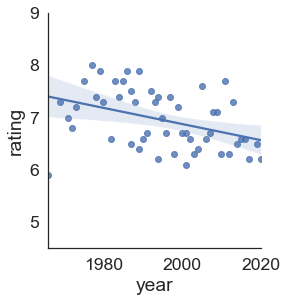

In [214]:
plot_df = films_and_features_to_analyze_df[['year', 'rating']]
sns.set(font_scale=1.6)
sns.set_style("white")
g=sns.lmplot(x='year', y='rating', data=plot_df, 
           fit_reg=True, aspect=1);
g.set(ylim=(4.5, 9))
g.set(xlim=(year_min, year_min+(year_max-year_min)))
g.fig.set_figwidth(4)
g.fig.set_figheight(4)

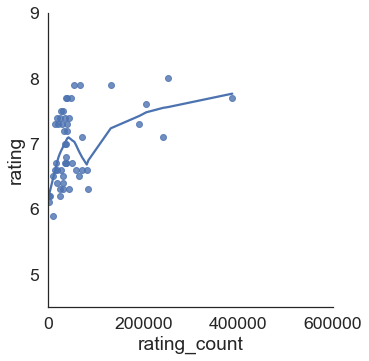

In [215]:
plot_df = films_and_features_to_analyze_df[['rating_count', 'rating']]
g=sns.lmplot(x='rating_count', y='rating', data=plot_df, 
           lowess=True,);
g.set(ylim=(4.5, 9))
g.set(xlim=(0, 600000))

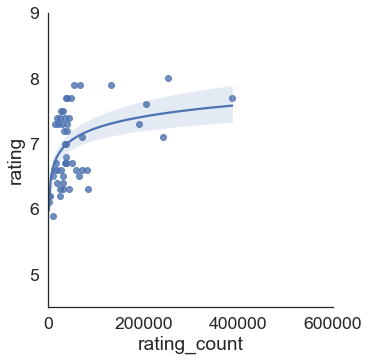

In [216]:
g=sns.lmplot(x='rating_count', y='rating', data=plot_df,
           logx=True,);
g.set(ylim=(4.5, 9))
g.set(xlim=(0, 600000))

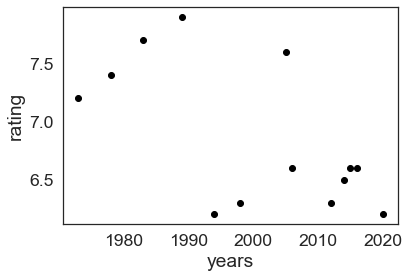

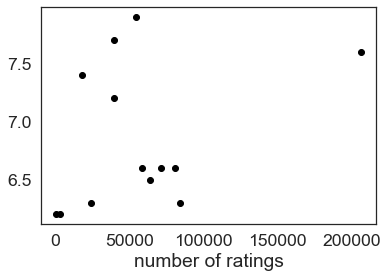

In [217]:
plt.ylabel("rating")
plt.scatter(X_test_cont_w_log['year'], y_test,  color='black')
plt.xlabel('years')
plt.show()
#plt.plot(X_test_cont_w_log['year'], y_pred, color='blue', linewidth=3)
plt.scatter(X_test_cont_w_log['rating_count'], y_test,  color='black')
plt.xlabel('number of ratings')
plt.show()

### Fit to `log_rating_count` and maybe `year`


In [218]:
lr = LinearRegression()

X_train_logs_only = X_train_scaled_df[['year','log_rating_count']]

X_test_logs_only = X_test_scaled_df[['year','log_rating_count']]



lr.fit(X_train_logs_only, y_train)

lr.coef_

y_pred = lr.predict(X_test_logs_only)

y_pred

y_test


from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))



r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.49
r2: 0.32


In [219]:
films_and_features_to_analyze_df

,title,year,duration,cinematographer,documentary,tv_series,rating,rating_count,Woody Allen,Mia Farrow,...,John Doumanian,Tony Roberts,Alan Alda,Paul Herman,Ira Wheeler,Dianne Wiest,Louise Lasser,Douglas McGrath,Scarlett Johansson,Sam Waterston
0,Rifkin's Festival,2020.0,92.0,Vittorio Storaro,0.0,0.0,6.2,723.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,A Rainy Day in New York,2019.0,92.0,Vittorio Storaro,0.0,0.0,6.5,30151.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Wonder Wheel,2017.0,101.0,Vittorio Storaro,0.0,0.0,6.2,25209.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Café Society,2016.0,96.0,Vittorio Storaro,0.0,0.0,6.6,71114.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Irrational Man,2015.0,95.0,Darius Khondji,0.0,0.0,6.6,58704.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Magic in the Moonlight,2014.0,97.0,Darius Khondji,0.0,0.0,6.5,64032.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Blue Jasmine,2013.0,98.0,Javier Aguirresarobe,0.0,0.0,7.3,191782.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,To Rome With Love,2012.0,112.0,Darius Khondji,0.0,0.0,6.3,84340.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Midnight in Paris,2011.0,94.0,Darius Khondji,0.0,0.0,7.7,387522.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,You Will Meet a Tall Dark Stranger,2010.0,98.0,Vilmos Zsigmond,0.0,0.0,6.3,43804.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Attempt LassoCV

In [220]:
#X_cols = [*films_and_features_to_analyze_df.columns[1:3],*films_and_features_to_analyze_df.columns[4:6], *films_and_features_to_analyze_df.columns[7:], ]
#X_cols = [*films_and_features_to_analyze_df.columns[1:3],*films_and_features_to_analyze_df.columns[4:6], *films_and_features_to_analyze_df.columns[7:], ]
X_cols = ['year', 'duration', 'rating_count']

#films_and_features_to_analyze_df_copy = copy.deepcopy(films_and_features_to_analyze_df) 

X= films_and_features_to_analyze_df[X_cols]
y= films_and_features_to_analyze_df['rating']

#selected_cols =cont_columns

X['log_year'] = np.log(X.year)
X['log_rating_count'] = np.log(X.rating_count)

# X_test_cont_w_log = copy.deepcopy(X_test_cont) 

# X_train_cont_w_log['log_year'] = np.log(X_train_cont_w_log.year)
# X_test_cont_w_log['log_year'] = np.log(X_test_cont_w_log.year)

# X_train_cont_w_log['log_rating_count'] = np.log(X_train_cont_w_log.rating_count)
# X_test_cont_w_log['log_rating_count'] = np.log(X_test_cont_w_log.rating_count)

# X= films_and_features_to_analyze_df[X_cols]
# y= films_and_features_to_analyze_df['rating']

<ipython-input-220-ad886dc0e91a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_year'] = np.log(X.year)
<ipython-input-220-ad886dc0e91a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['log_rating_count'] = np.log(X.rating_count)


In [221]:
X_, X_test, y_, y_test = train_test_split(X, y, test_size=.2, random_state=12) #10
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=.25, random_state=15)#30

#X_train_val, X_test, y_train_val, y_test = train_test_split( X, y, test_size=.20, random_state=32)

ss=StandardScaler()

X_train_scaled = ss.fit_transform( X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled = ss.fit_transform( X_test )

In [222]:
X.columns

Index(['year', 'duration', 'rating_count', 'log_year', 'log_rating_count'], dtype='object')

In [223]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

model = LassoCV()


In [224]:
poly=PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression val R^2: -26.206


In [225]:
lm_poly.coef_

array([ 0.00000000e+00,  9.54744263e+03,  1.43619455e+03, -2.40673409e+00,
        8.48692968e+01, -4.96010979e+02,  3.15823512e-01,  1.08466330e-01,
       -1.81006566e-04, -1.25779734e+03, -1.14368166e-01,  6.23548050e-05,
        2.05199911e-07, -2.17484391e+02, -8.17705478e-03,  4.28492629e-10,
        3.64707659e-01, -2.62131862e-04,  1.05448893e+03,  9.99617234e+01,
       -2.26499291e+00])

In [226]:
lm_poly.fit(X_,y_)
print(f'Linear Regression test R^2: {lm_poly.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.411


In [227]:
#lm_poly.alpha_

In [228]:
#model.fit(X_train_scaled,y_train_val)

In [229]:
#model.coef_

In [230]:
#list(zip(X_cols, model.coef_))

In [231]:
#model.score(X_test, y_test)

In [232]:
#model.alpha_

## Repartition data set to analyze `budget` and  `worldwide_gross`

In [233]:
films_to_analyze_financial_df = films_to_analyze[(films_to_analyze['budget'] > 0) & (films_to_analyze['worldwide_gross'] > 0)]

In [234]:
#films_to_analyze_financial_df = films_to_analyze[(films_to_analyze['budget'] > 0) & (films_df_reordered['worldwide_gross'] > 0)]

In [235]:
first_actor_column = (len(films_to_analyze_financial_df.columns) - len(dict_of_all_actors))
first_actor_column


15

In [236]:
actor_columns = films_to_analyze_financial_df.iloc[:, first_actor_column:].columns
actor_columns


Index(['Woody Allen', 'Mia Farrow', 'Diane Keaton', 'Maurice Sonnenberg',
       'Wallace Shawn', 'Stephanie Roth Haberle', 'Dan Frazer', 'Julie Kavner',
       'John Doumanian', 'Tony Roberts',
       ...
       'Radha Mitchell', 'Michael J. Farina', 'Jonny Lee Miller',
       'Chloë Sevigny', 'Matt Servitto', 'Arija Bareikis', 'Brooke Smith',
       'Zak Orth', 'Will Ferrell', 'Akiko Wakabayashi'],
      dtype='object', length=706)

In [237]:
films_to_analyze_financial_df[actor_columns].sum()

Woody Allen           20.0
Mia Farrow             9.0
Diane Keaton           6.0
Maurice Sonnenberg     5.0
Wallace Shawn          2.0
                      ... 
Arija Bareikis         0.0
Brooke Smith           0.0
Zak Orth               0.0
Will Ferrell           0.0
Akiko Wakabayashi      0.0
Length: 706, dtype: float64

In [238]:
actors_num_of_appearances = films_to_analyze_financial_df[actor_columns].sum()
actors_num_of_appearances

Woody Allen           20.0
Mia Farrow             9.0
Diane Keaton           6.0
Maurice Sonnenberg     5.0
Wallace Shawn          2.0
                      ... 
Arija Bareikis         0.0
Brooke Smith           0.0
Zak Orth               0.0
Will Ferrell           0.0
Akiko Wakabayashi      0.0
Length: 706, dtype: float64

In [239]:
appearances_threshold = 3
prevalent_actors_mask = (actors_num_of_appearances >= appearances_threshold)
prevalent_actors_mask

Woody Allen            True
Mia Farrow             True
Diane Keaton           True
Maurice Sonnenberg     True
Wallace Shawn         False
                      ...  
Arija Bareikis        False
Brooke Smith          False
Zak Orth              False
Will Ferrell          False
Akiko Wakabayashi     False
Length: 706, dtype: bool

In [240]:
prevalent_actor_columns = actor_columns[prevalent_actors_mask]
prevalent_actor_columns 


Index(['Woody Allen', 'Mia Farrow', 'Diane Keaton', 'Maurice Sonnenberg',
       'Stephanie Roth Haberle', 'Julie Kavner', 'John Doumanian', 'Alan Alda',
       'Paul Herman', 'Ira Wheeler', 'Dianne Wiest', 'Scarlett Johansson',
       'Sam Waterston'],
      dtype='object')

In [241]:
analysis_columns = ['title', 'year', 'duration', 'budget', 'worldwide_gross','cinematographer', 'documentary', 'tv_series','rating', 'rating_count', *prevalent_actor_columns]
analysis_columns


['title',
 'year',
 'duration',
 'budget',
 'worldwide_gross',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating',
 'rating_count',
 'Woody Allen',
 'Mia Farrow',
 'Diane Keaton',
 'Maurice Sonnenberg',
 'Stephanie Roth Haberle',
 'Julie Kavner',
 'John Doumanian',
 'Alan Alda',
 'Paul Herman',
 'Ira Wheeler',
 'Dianne Wiest',
 'Scarlett Johansson',
 'Sam Waterston']

In [242]:
films_and_features_to_analyze_financial_df = films_to_analyze_financial_df[analysis_columns]

In [243]:
films_and_features_to_analyze_financial_df.head(10)

,title,year,duration,budget,worldwide_gross,cinematographer,documentary,tv_series,rating,rating_count,...,Maurice Sonnenberg,Stephanie Roth Haberle,Julie Kavner,John Doumanian,Alan Alda,Paul Herman,Ira Wheeler,Dianne Wiest,Scarlett Johansson,Sam Waterston
2,Wonder Wheel,2017.0,101.0,25000000.0,13736872.0,Vittorio Storaro,0.0,0.0,6.2,25209.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Café Society,2016.0,96.0,30000000.0,43763247.0,Vittorio Storaro,0.0,0.0,6.6,71114.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Irrational Man,2015.0,95.0,11000000.0,29083597.0,Darius Khondji,0.0,0.0,6.6,58704.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Magic in the Moonlight,2014.0,97.0,16800000.0,33518508.0,Darius Khondji,0.0,0.0,6.5,64032.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Blue Jasmine,2013.0,98.0,18000000.0,102912961.0,Javier Aguirresarobe,0.0,0.0,7.3,191782.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,To Rome With Love,2012.0,112.0,17000000.0,73244881.0,Darius Khondji,0.0,0.0,6.3,84340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Midnight in Paris,2011.0,94.0,17000000.0,162279328.0,Darius Khondji,0.0,0.0,7.7,387522.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,You Will Meet a Tall Dark Stranger,2010.0,98.0,22000000.0,36015260.0,Vilmos Zsigmond,0.0,0.0,6.3,43804.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,Whatever Works,2009.0,93.0,15000000.0,35106706.0,Harris Savides,0.0,0.0,7.1,70990.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Vicky Cristina Barcelona,2008.0,96.0,15500000.0,104504817.0,Javier Aguirresarobe,0.0,0.0,7.1,242217.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


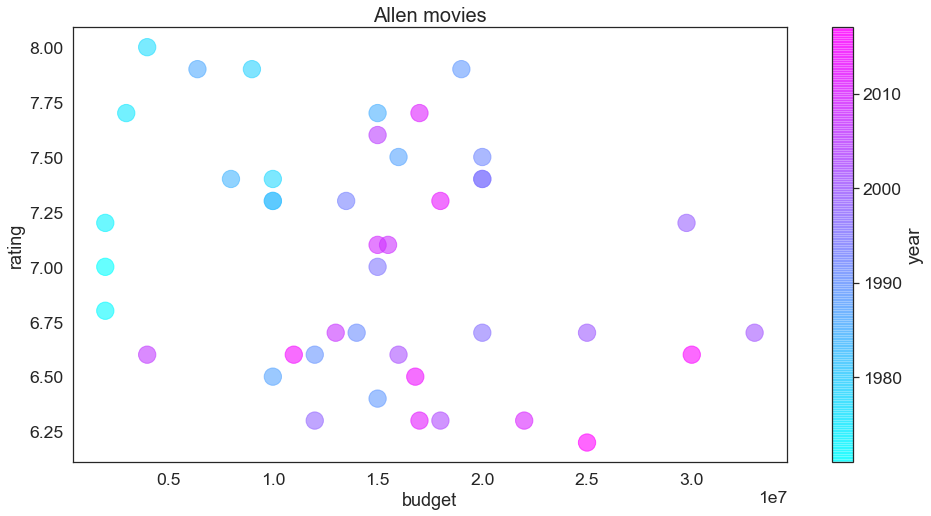

In [244]:
x_label = 'budget'
y_label = 'rating'
x_ = films_and_features_to_analyze_financial_df[x_label]
y_ = films_and_features_to_analyze_financial_df[y_label]

plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
cmap=plt.get_cmap("cool")
color_dimension = 'year'
cm=films_and_features_to_analyze_financial_df[color_dimension].tolist()

category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension)

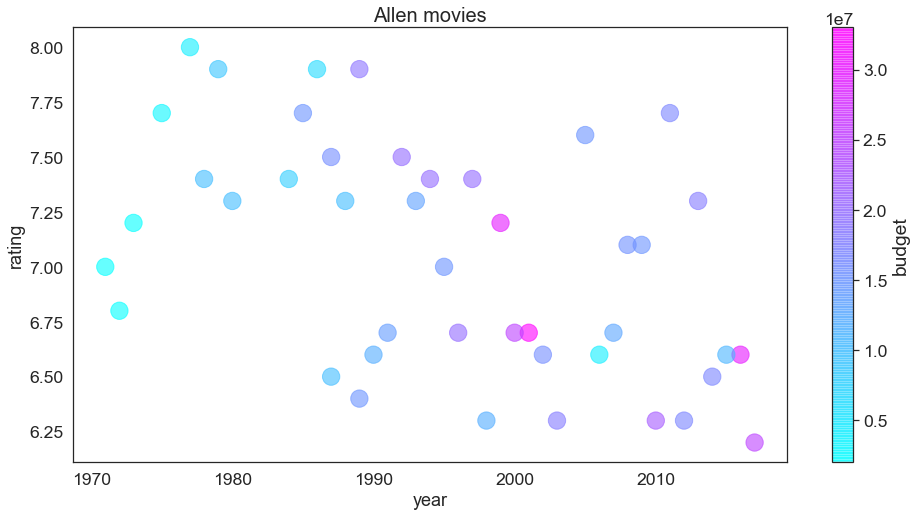

In [245]:
x_label = 'year'
y_label = 'rating'
x_ = films_and_features_to_analyze_financial_df[x_label]
y_ = films_and_features_to_analyze_financial_df[y_label]

plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
cmap=plt.get_cmap("cool")
color_dimension = 'budget'
cm=films_and_features_to_analyze_financial_df[color_dimension].tolist()

category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension)

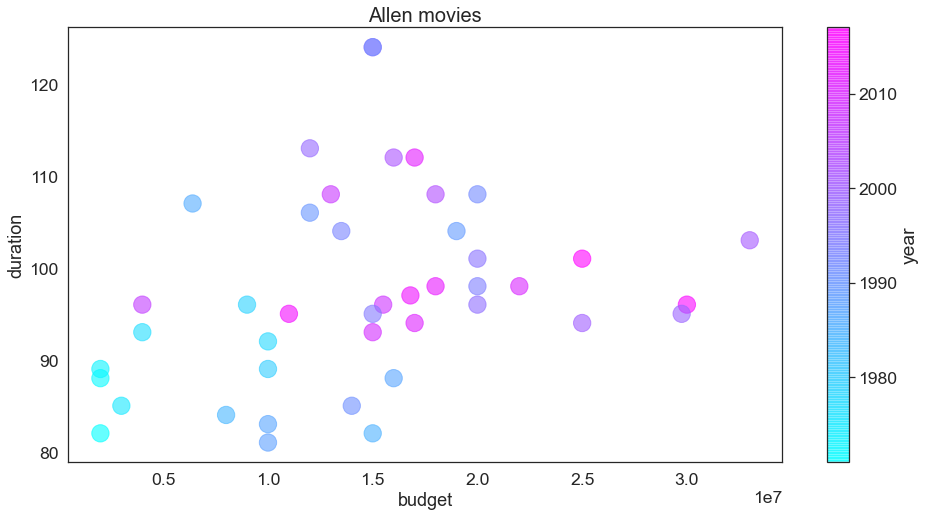

In [246]:
x_label = 'budget'
y_label = 'duration'
x_ = films_and_features_to_analyze_financial_df[x_label]
y_ = films_and_features_to_analyze_financial_df[y_label]

plt.figure(figsize=(16,8))

size_ = 300
alpha_ = .6
plt.xlabel(x_label, fontsize='18')
plt.ylabel(y_label, fontsize='18')
plt.title(director.title() + ' movies', fontsize='20')
cmap=plt.get_cmap("cool")
color_dimension = 'year'
cm=films_and_features_to_analyze_financial_df[color_dimension].tolist()

category = 'tv_series'
plt.scatter(x=x_, y=y_, marker='o', alpha=alpha_, c=cm,cmap="cool", s=(size_,))
plt.colorbar(label=color_dimension)

In [247]:
cinematographer_include_threshold = films_and_features_to_analyze_df['cinematographer'].value_counts().min()
cinematographer_include_threshold

2

In [248]:
value_counts = films_and_features_to_analyze_financial_df['cinematographer'].value_counts() # Specific column 
to_remove = value_counts[value_counts <= cinematographer_include_threshold].index
films_and_features_to_analyze_financial_df['cinematographer'].replace(to_remove, 'OTHER', inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [249]:
selected_cols = [*films_and_features_to_analyze_financial_df.columns[1:8], *films_and_features_to_analyze_financial_df.columns[9:]]

In [250]:
selected_cols

['year',
 'duration',
 'budget',
 'worldwide_gross',
 'cinematographer',
 'documentary',
 'tv_series',
 'rating_count',
 'Woody Allen',
 'Mia Farrow',
 'Diane Keaton',
 'Maurice Sonnenberg',
 'Stephanie Roth Haberle',
 'Julie Kavner',
 'John Doumanian',
 'Alan Alda',
 'Paul Herman',
 'Ira Wheeler',
 'Dianne Wiest',
 'Scarlett Johansson',
 'Sam Waterston']

In [251]:
X= films_and_features_to_analyze_financial_df[selected_cols]
y= films_and_features_to_analyze_financial_df['rating']

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [253]:
### Preprocessing

#### Categorical Variable Preprocessing

cat_ohe_vars = ['cinematographer']
X_train_cat_ohe = X_train[cat_ohe_vars]
#X_train_cat_ohe 

#### OneHotEncoding

In [254]:


#ohe = OneHotEncoder(sparse=False, drop='first')
ohe = OneHotEncoder(sparse=False,  handle_unknown='ignore')
ohe.fit(X_train_cat_ohe)
cats_ohe = ohe.transform(X_train_cat_ohe)


columns=ohe.get_feature_names(cat_ohe_vars)

columns

X_train_cat_ohe_df = pd.DataFrame(cats_ohe, columns=columns, index=X_train_cat_ohe.index)
X_train_cat_ohe_df.head()

#### Repeating transformations on testing set

X_test_cat_ohe = X_test[['cinematographer']]
X_test_cat_ohe
cats_ohe_test = ohe.transform(X_test_cat_ohe)

cat_ohe_columns = ohe.get_feature_names(['cinematographer'])
X_test_cat_ohe_df = pd.DataFrame(cats_ohe_test, columns=cat_ohe_columns)

### Continous Variable Preprocessing

#### Select continuous variables from training set

X_train_cont = X_train[['year', 'duration', 'budget','rating_count']]
X_train_cont.head(70)



####  scale the continuous variables in the train set

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont)
X_train_scaled = ss.transform(X_train_cont)

cont_columns = X_train_cont.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()


#### select and scale the continuous variables in the test set

X_test_cont = X_test[['year', 'duration', 'budget','rating_count']]
X_test_cont.head()

X_test_scaled = ss.transform(X_test_cont)

cont_columns = X_test_cont.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test_cont.index)

X_test_scaled_df.head()

### Combine the continuous, categorical, and ohe cat features for our testing set


cat_columns = ['documentary', 'tv_series', *prevalent_actor_columns]
X_train_cat_df = X_train[cat_columns]


X_train_combined = pd.concat([X_train_scaled_df, X_train_cat_ohe_df, X_train_cat_df, ], axis='columns')

X_train_combined.head(10)

X_train.shape

### Combine the continuous and categorical features for our testing set


X_test_cat_df = X_test[cat_columns]

X_test_scaled_df.shape[0] == X_test_cat_df.shape[0] == X_test_cat_ohe_df.shape[0]


X_test_combined = pd.concat([X_test_scaled_df.reset_index(drop=True), X_test_cat_ohe_df.reset_index(drop=True), X_test_cat_df.reset_index(drop=True) ], axis=1)
#X_test_combined = pd.concat([X_test_scaled_df, X_test_cat_ohe_df, X_test_cat_df ], axis=1)

X_test_combined

### Now make predictions by instantiating the Linear Regression Model 

lr = LinearRegression()

lr.fit(X_train_combined, y_train)

lr.coef_

y_pred = lr.predict(X_test_combined)

y_pred

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

print(r2)

score = lr.score(X_test_combined, y_test) 
score

RMSE: 0.51
r2: 0.03
0.03010025242291703


0.03010025242291703

### Look at continous variable including `budget`

In [255]:
films_and_features_to_analyze_financial_df.columns

#selected_cols = ['budget', 'rating_count']
selected_cols = ['year', 'duration', 'budget']
#selected_cols = ['budget']
X= films_and_features_to_analyze_financial_df[selected_cols]
y= films_and_features_to_analyze_financial_df['rating']

In [256]:


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [257]:
X_train.columns

Index(['year', 'duration', 'budget'], dtype='object')

In [258]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_train_scaled

array([[ 0.17746268,  1.42057702, -0.34598363],
       [ 0.33520728, -0.33850817,  1.52201363],
       [-0.37464343, -1.17175905, -0.05859943],
       [ 0.25633498, -0.24592474,  2.20455108],
       [-1.39998334, -0.52367503, -0.63336782],
       [ 1.28167489,  1.32799359,  0.37247686],
       [-0.53238803,  2.43899475,  0.08509266],
       [-0.61126033, -1.54209277, -0.63336782],
       [-0.53238803,  0.58732614,  0.65986105],
       [ 0.01971808,  0.30957585,  0.80355315],
       [ 0.72956878,  2.43899475,  0.08509266],
       [-0.05915423, -0.24592474,  0.08509266],
       [ 1.59716409, -0.15334131,  2.24047411],
       [-1.79434484, -0.80142532, -1.78290459],
       [ 1.51829179, -0.24592474, -0.48967572],
       [-0.29577113,  0.95765986,  0.80355315],
       [ 1.36054719,  0.03182555,  0.51616895],
       [-0.69013263, -0.89400875,  0.22878476],
       [ 1.04505798, -0.4310916 ,  0.08509266],
       [ 0.88731338,  0.95765986, -0.20229153],
       [-0.92674953, -1.26434248, -0.920

In [259]:
cont_columns = X_train.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont.index)

X_train_scaled_df.head()

,year,duration,budget
18,0.177463,1.420577,-0.345984
2,0.335207,-0.338508,1.522014
48,-0.374643,-1.171759,-0.058599
37,0.256335,-0.245925,2.204551
49,-1.399983,-0.523675,-0.633368


In [260]:
X_train_combined = pd.concat([X_train_scaled_df.reset_index(drop=True)], axis='columns')

X_train_combined.head()

,year,duration,budget
0,0.177463,1.420577,-0.345984
1,0.335207,-0.338508,1.522014
2,-0.374643,-1.171759,-0.058599
3,0.256335,-0.245925,2.204551
4,-1.399983,-0.523675,-0.633368


In [261]:
#X_test = X_test[['year', 'budget','rating_count']]

X_test = X_test[selected_cols]
X_test.head()

X_test_scaled = ss.transform(X_test)

cont_columns = X_test.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=cont_columns, index=X_test.index)

X_test_scaled_df.head()

,year,duration,budget
17,0.571824,0.957660,0.516169
45,-1.321111,-0.153341,-0.777060
12,0.966186,-0.153341,0.156939
52,-1.952089,-1.449509,-1.782905
44,-1.242239,-0.801425,-0.633368


In [262]:
X_test_combined = pd.concat([X_test_scaled_df.reset_index(drop=True) ], axis=1)

X_test_combined

,year,duration,budget
0,0.571824,0.957660,0.516169
1,-1.321111,-0.153341,-0.777060
2,0.966186,-0.153341,0.156939
3,-1.952089,-1.449509,-1.782905
4,-1.242239,-0.801425,-0.633368
5,1.123930,0.031826,1.090937
6,-0.769005,0.865076,-1.150659
7,-0.453516,0.772493,-0.345984
8,1.676036,0.309576,1.522014
9,0.414080,0.494743,2.671550


In [263]:
lr = LinearRegression()

lr.fit(X_train_combined,y_train)

lr.coef_

array([-0.22011688, -0.0538423 ,  0.09119928])

In [264]:
y_pred = lr.predict(X_test_combined)

y_pred

array([6.92901847, 7.28756279, 6.86927017, 7.40450814, 7.31820061,
       6.90975811, 7.07712896, 7.08605521, 6.81258937, 7.18523448,
       7.3318124 ])

In [265]:

from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

RMSE: 0.52
r2: 0.26


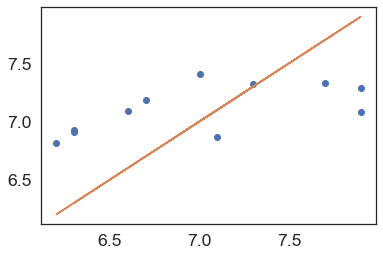

In [266]:
plt.scatter(y_test, y_pred)
plt.plot(y_pred, y_pred)
plt.plot(y_test, y_test)

In [267]:
res = y_test-y_pred
res

17   -0.629018
45    0.612437
12    0.230730
52   -0.404508
44   -0.018201
10   -0.609758
39    0.822871
33   -0.486055
2    -0.612589
21   -0.485234
40    0.368188
Name: rating, dtype: float64

In [268]:
X_test

,year,duration,budget
17,2003.0,108.0,18000000.0
45,1979.0,96.0,9000000.0
12,2008.0,96.0,15500000.0
52,1971.0,82.0,2000000.0
44,1980.0,89.0,10000000.0
10,2010.0,98.0,22000000.0
39,1986.0,107.0,6400000.0
33,1990.0,106.0,12000000.0
2,2017.0,101.0,25000000.0
21,2001.0,103.0,33000000.0


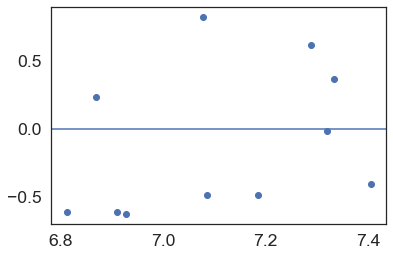

In [269]:
plt.scatter(y_pred, res)
plt.axhline(y=0)
#plt.plot(y_pred, 0)

In [270]:
X_train_combined.head()

,year,duration,budget
0,0.177463,1.420577,-0.345984
1,0.335207,-0.338508,1.522014
2,-0.374643,-1.171759,-0.058599
3,0.256335,-0.245925,2.204551
4,-1.399983,-0.523675,-0.633368


In [271]:
X_train_cont

,year,duration,budget,rating_count
18,2002.0,112.0,16000000.0,25820.0
2,2017.0,101.0,25000000.0,25209.0
48,1975.0,85.0,3000000.0,35993.0
37,1987.0,83.0,10000000.0,9096.0
49,1973.0,89.0,2000000.0,39747.0
40,1985.0,82.0,15000000.0,47042.0
12,2008.0,96.0,15500000.0,242217.0
38,1987.0,88.0,16000000.0,31559.0
14,2006.0,96.0,4000000.0,80731.0
31,1992.0,108.0,20000000.0,27486.0


In [272]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()

cross_val_score(lm, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([-0.01786292, -0.44397189, -0.03690531, -0.04398659, -0.38437238])

In [273]:
lm.score

<bound method RegressorMixin.score of LinearRegression()>

## include `log(year)` `budget^2` and `log(rating_count)`

In [274]:
X_train_cont_w_log = copy.deepcopy(X_train_cont) 
X_test_cont_w_log = copy.deepcopy(X_test_cont) 

X_train_cont_w_log['log_year'] = np.log(X_train_cont_w_log.year)
X_test_cont_w_log['log_year'] = np.log(X_test_cont_w_log.year)

#X_train_cont_w_log['log_budget'] = np.log(X_train_cont_w_log.budget)
#X_test_cont_w_log['log_budget'] = np.log(X_test_cont_w_log.budget)
X_train_cont_w_log['pow_budget'] = X_train_cont_w_log.budget**2
X_test_cont_w_log['pow_budget'] =  X_test_cont_w_log.budget**2


X_train_cont_w_log['log_rating_count'] = np.log(X_train_cont_w_log.rating_count)
X_test_cont_w_log['log_rating_count'] = np.log(X_test_cont_w_log.rating_count)


In [275]:
# films_and_features_to_analyze_financial_df.columns

#selected_cols = [ 'log_year', 'log_budget', 'log_rating_count']
selected_cols = ['year','budget', 'rating_count', 'log_year', 'pow_budget', 'log_rating_count']
# #selected_cols = ['year', 'duration', 'budget', 'rating_count']
# #selected_cols = ['budget']
# X= films_and_features_to_analyze_financial_df[selected_cols]
# y= films_and_features_to_analyze_financial_df['rating']

X_train_cont_w_log = X_train_cont_w_log[ selected_cols ]
X_test_cont_w_log  = X_test_cont_w_log[ selected_cols ]

# X_train, X_test, y_train, y_test = train_test_split(X, y)

# X_train.columns

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train_cont_w_log)
X_train_scaled = ss.transform(X_train_cont_w_log)
X_train_scaled.shape

cont_columns = X_train_cont_w_log.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=cont_columns, index=X_train_cont_w_log.index)
X_train_scaled_df.head()

X_test_scaled_df = ss.transform(X_test_cont_w_log)

In [276]:
X_test_scaled_df

array([[ 1.10545708,  0.05203112,  0.22986494,  1.10496029, -0.18261662,
         0.7381809 ],
       [ 0.80439643,  0.05203112,  2.44779899,  0.80574211, -0.18261662,
         2.06576544],
       [-0.39984618,  0.5663156 , -0.03912131, -0.39712998,  0.32928075,
         0.41130911],
       [-1.75461911, -1.61939342, -0.37784534, -1.76198184, -1.01444986,
        -0.17985578],
       [ 0.42807061,  1.33774231, -0.32995807,  0.43087882,  1.32296389,
        -0.07724434],
       [-0.02352036,  0.69488672, -0.353598  , -0.02019614,  0.47607485,
        -0.12684352],
       [-0.09878553, -0.14082555, -0.27980531, -0.09550724, -0.34352554,
         0.02186478],
       [ 1.55704806, -0.46225335,  0.0281704 ,  1.55267236, -0.57406756,
         0.50147126],
       [ 0.6538661 ,  0.43774448, -0.44828904,  0.6559091 ,  0.19001455,
        -0.34805345],
       [ 1.25598741,  0.30917336,  5.42624919,  1.25434604,  0.05827626,
         2.85231619],
       [-0.62564167, -1.0536805 ,  0.16575806, -0.

In [277]:
cont_columns = X_test_cont_w_log.columns
cont_columns

Index(['year', 'budget', 'rating_count', 'log_year', 'pow_budget',
       'log_rating_count'],
      dtype='object')

In [278]:
X_test_scaled_df

array([[ 1.10545708,  0.05203112,  0.22986494,  1.10496029, -0.18261662,
         0.7381809 ],
       [ 0.80439643,  0.05203112,  2.44779899,  0.80574211, -0.18261662,
         2.06576544],
       [-0.39984618,  0.5663156 , -0.03912131, -0.39712998,  0.32928075,
         0.41130911],
       [-1.75461911, -1.61939342, -0.37784534, -1.76198184, -1.01444986,
        -0.17985578],
       [ 0.42807061,  1.33774231, -0.32995807,  0.43087882,  1.32296389,
        -0.07724434],
       [-0.02352036,  0.69488672, -0.353598  , -0.02019614,  0.47607485,
        -0.12684352],
       [-0.09878553, -0.14082555, -0.27980531, -0.09550724, -0.34352554,
         0.02186478],
       [ 1.55704806, -0.46225335,  0.0281704 ,  1.55267236, -0.57406756,
         0.50147126],
       [ 0.6538661 ,  0.43774448, -0.44828904,  0.6559091 ,  0.19001455,
        -0.34805345],
       [ 1.25598741,  0.30917336,  5.42624919,  1.25434604,  0.05827626,
         2.85231619],
       [-0.62564167, -1.0536805 ,  0.16575806, -0.

In [279]:
cont_columns = X_test_cont_w_log.columns
X_test_scaled_df = pd.DataFrame(X_test_scaled_df, columns=cont_columns, index=X_test_cont_w_log.index)
#X_test_scaled_df = pd.DataFrame(X_test_scaled)


In [280]:
# X_train_combined = pd.concat([X_train_scaled_df.reset_index(drop=True)], axis='columns')

# X_train_combined.head()


# X_test_cont = X_test[['year','budget', 'rating_count', 'log_year', 'log_budget', 'log_rating_count']]
# X_test_cont.head()




X_test_scaled_df.head()

# X_test_combined = pd.concat([X_test_scaled_df.reset_index(drop=True) ], axis=1)

# X_test_combined

lr = LinearRegression()

lr.fit(X_train_scaled_df,y_train)

lr.coef_

y_pred = lr.predict(X_test_scaled_df)

y_pred



from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}\nr2: {r2:.2f}')

X_train_scaled_df.head()

RMSE: 0.61
r2: -0.01


,year,budget,rating_count,log_year,pow_budget,log_rating_count
18,0.578601,0.180602,-0.511674,0.580936,-0.065934,-0.521642
2,1.707578,1.337742,-0.521704,1.701614,1.322964,-0.551473
48,-1.453558,-1.490822,-0.344667,-1.457607,-0.995630,-0.107873
37,-0.550377,-0.590824,-0.786225,-0.548169,-0.653111,-1.821233
49,-1.604089,-1.619393,-0.283039,-1.609717,-1.014450,0.015706
